In [21]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
# Load a model
# model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("weights/yolov8s.pt")  # load a pretrained model (recommended for training)

# results

In [3]:
results: list = model("bus.jpg")  # predict on an image
# results: list = model.predict("bus.jpg")
results[0]


image 1/1 C:\Users\Administrator\Desktop\self\yolov8-ultralytics\bus.jpg: 640x480 4 persons, 1 bus, 38.7ms
Speed: 3.0ms preprocess, 38.7ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


ultralytics.yolo.engine.results.Results object with attributes:

boxes: ultralytics.yolo.engine.results.Boxes object
keypoints: None
keys: ['boxes']
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'c

## boxes

In [4]:
results[0].boxes.data   # raw bboxes tensor, (N, 6) or boxes.boxes

tensor([[1.9989e+01, 2.2960e+02, 8.0562e+02, 7.4782e+02, 9.2022e-01, 5.0000e+00],
        [6.6772e+02, 3.8936e+02, 8.0967e+02, 8.7938e+02, 8.9877e-01, 0.0000e+00],
        [5.0511e+01, 4.0051e+02, 2.4500e+02, 9.0293e+02, 8.8731e-01, 0.0000e+00],
        [2.2200e+02, 4.0819e+02, 3.4526e+02, 8.6076e+02, 8.8055e-01, 0.0000e+00],
        [1.7376e-01, 5.5013e+02, 6.7284e+01, 8.6807e+02, 6.3816e-01, 0.0000e+00]], device='cuda:0')

In [24]:
xyxys = results[0].boxes.xyxy   # box with xyxy format, (N, 4)
xyxys

tensor([[1.9989e+01, 2.2960e+02, 8.0562e+02, 7.4782e+02],
        [6.6772e+02, 3.8936e+02, 8.0967e+02, 8.7938e+02],
        [5.0511e+01, 4.0051e+02, 2.4500e+02, 9.0293e+02],
        [2.2200e+02, 4.0819e+02, 3.4526e+02, 8.6076e+02],
        [1.7376e-01, 5.5013e+02, 6.7284e+01, 8.6807e+02]], device='cuda:0')

In [6]:
results[0].boxes.xywh   # box with xywh format, (N, 4)

tensor([[412.8050, 488.7100, 785.6316, 518.2144],
        [738.6946, 634.3691, 141.9547, 490.0230],
        [147.7544, 651.7198, 194.4868, 502.4294],
        [283.6280, 634.4741, 123.2612, 452.5717],
        [ 33.7288, 709.0997,  67.1100, 317.9405]], device='cuda:0')

In [7]:
results[0].boxes.xyxyn  # box with xyxy format but normalized, (N, 4)

tensor([[2.4678e-02, 2.1260e-01, 9.9459e-01, 6.9242e-01],
        [8.2434e-01, 3.6052e-01, 9.9959e-01, 8.1424e-01],
        [6.2359e-02, 3.7084e-01, 3.0247e-01, 8.3605e-01],
        [2.7407e-01, 3.7795e-01, 4.2625e-01, 7.9700e-01],
        [2.1451e-04, 5.0938e-01, 8.3066e-02, 8.0377e-01]], device='cuda:0')

In [8]:
results[0].boxes.xywhn  # box with xywh format but normalized, (N, 4)

tensor([[0.5096, 0.4525, 0.9699, 0.4798],
        [0.9120, 0.5874, 0.1753, 0.4537],
        [0.1824, 0.6034, 0.2401, 0.4652],
        [0.3502, 0.5875, 0.1522, 0.4190],
        [0.0416, 0.6566, 0.0829, 0.2944]], device='cuda:0')

In [25]:
confs = results[0].boxes.conf   # confidence score, (N, 1)
confs

tensor([0.9202, 0.8988, 0.8873, 0.8805, 0.6382], device='cuda:0')

In [26]:
clses = results[0].boxes.cls    # cls, (N, 1)
clses

tensor([5., 0., 0., 0., 0.], device='cuda:0')

## masks

In [11]:
results[0].masks

## names

In [27]:
names = results[0].names

## orig_img

In [28]:
origin_img = results[0].orig_img

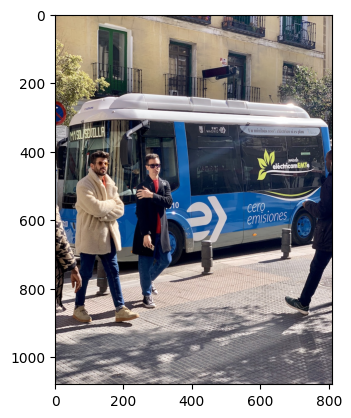

In [29]:
plt.imshow(cv2.cvtColor(origin_img, cv2.COLOR_BGR2RGB))

## orig_shape

In [15]:
results[0].orig_shape

(1080, 810)

## path

In [16]:
results[0].path

'C:\\Users\\Administrator\\Desktop\\self\\yolov8-ultralytics\\bus.jpg'

## probs

In [17]:
results[0].probs

## speed

In [18]:
results[0].speed

{'preprocess': 2.9926300048828125,
 'inference': 38.71607780456543,
 'postprocess': 3.989696502685547}

# draw

In [20]:
import matplotlib.pyplot as plt
import colorsys

In [22]:
def show_box(box: np.ndarray, ax, color: str | list[float]="green"):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor=color, facecolor=(0,0,0,0), lw=2))

In [31]:
def mulit_colors(num_classes: int):
    #---------------------------------------------------#
    #   https://github.com/bubbliiiing/yolov8-pytorch/blob/master/yolo.py#L88
    #   画框设置不同的颜色
    #---------------------------------------------------#
    #             (hue, saturation, value)
    hsv_tuples = [(x / num_classes, 0.6, 1.) for x in range(num_classes)]
    colors = [colorsys.hsv_to_rgb(*x) for x in hsv_tuples]
    colors = [(x[0], x[1], x[2]) for x in colors]
    return colors
colors = mulit_colors(len(names))

bus: 0.92
person: 0.90
person: 0.89
person: 0.88
person: 0.64


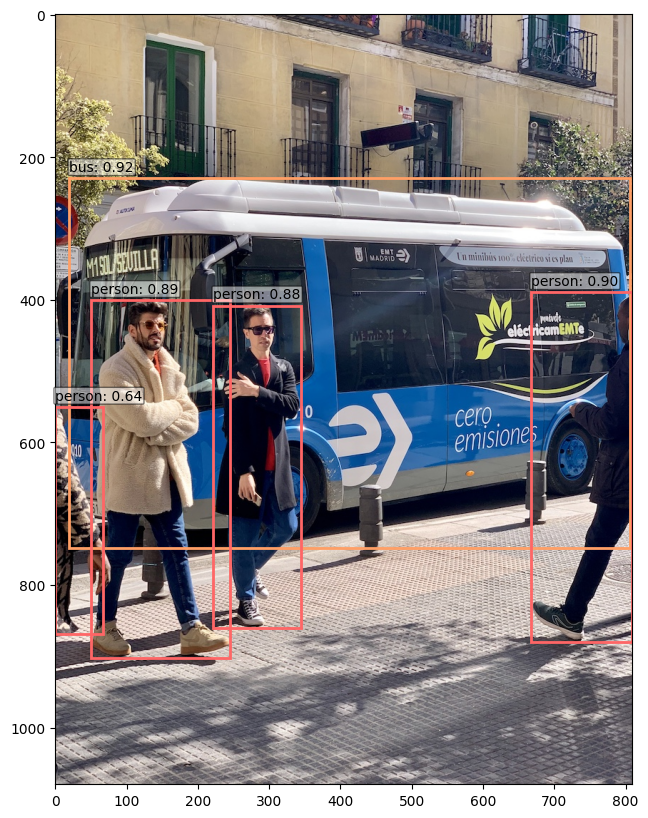

In [33]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(origin_img, cv2.COLOR_BGR2RGB))

for xyxy, conf, cls in zip(xyxys.cpu().numpy(), confs.cpu().numpy(), clses.cpu().numpy().astype(np.int64)):
    show_box(xyxy, plt.gca(), colors[cls])
    print(f"{names[cls]}: {conf:.2f}")
    # https://blog.csdn.net/TeFuirnever/article/details/88947248
    plt.text(xyxy[0],
             xyxy[1]-10 if xyxy[1] > 10 else xyxy[1]+20,
             f"{names[cls]}: {conf:.2f}",
             fontdict = dict(fontsize=10, color="black"),
             bbox=dict(boxstyle='round,pad=0.1', fc='white', ec='k',lw=1 ,alpha=0.5) # 文字背景
             )